In [121]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline 

P = np.loadtxt(os.path.join("results", "pitch_est_history.txt"), delimiter=",")
S = np.loadtxt(os.path.join("results", "rls_history.txt"), delimiter=",", dtype=np.complex_)
d = np.loadtxt(os.path.join("results", "input_signal.txt"), delimiter=",")
N = P.shape[1]
t = np.arange(N)

with open(os.path.join("results", "input_settings.json"), "r") as f:
    settings = json.load(f)

fs = settings["sampling_frequency"]

In [122]:
settings
S.shape

(5, 10000)

In [123]:
fs

44100

Text(0.5, 1.0, 'Frequency content')

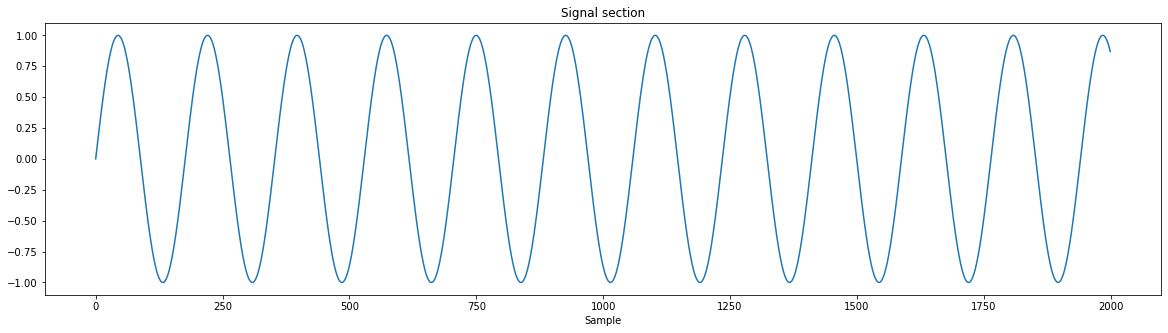

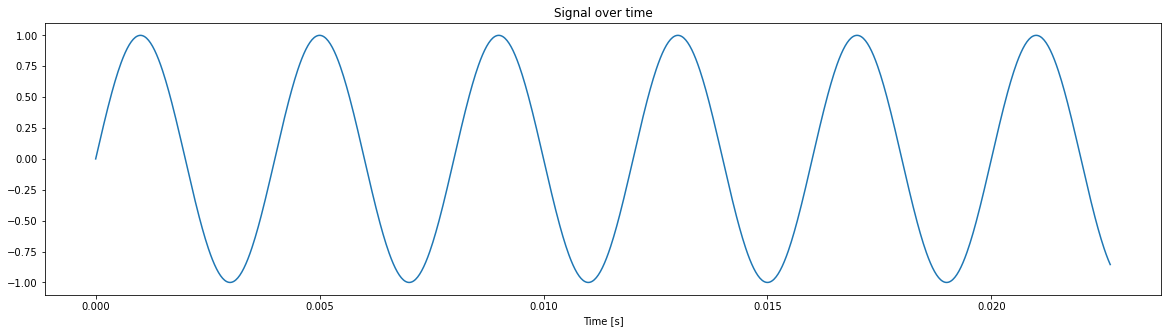

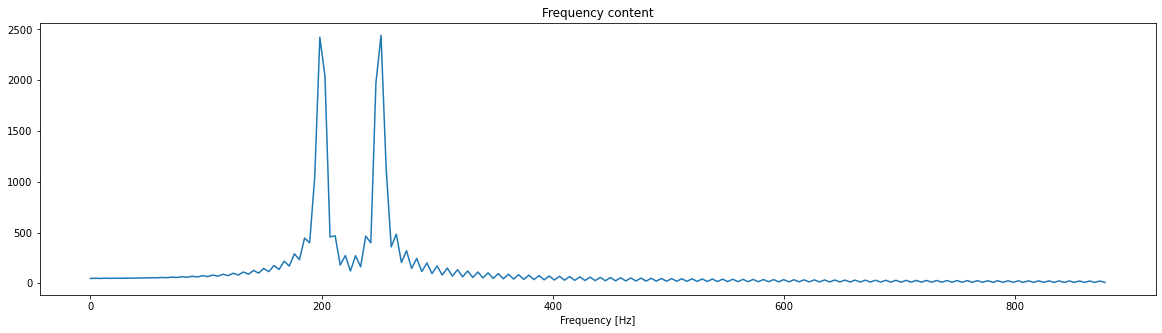

In [124]:
L = 1000

plt.figure(figsize=(20, 5))
plt.plot(d[0:2000])
plt.xlabel("Sample")
plt.title("Signal section")

plt.figure(figsize=(20,5))
plt.plot(np.arange(L)/settings['sampling_frequency'], d[:L])
plt.xlabel('Time [s]')
plt.title("Signal over time")

plt.figure(figsize=(20,5))
fs_ax = np.linspace(0, fs, num=len(d))
ys = abs(np.fft.fft(d))
stop = 200
plt.plot(fs_ax[:stop], ys[:stop])
plt.xlabel("Frequency [Hz]")
plt.title("Frequency content")

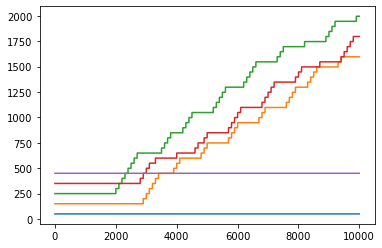

In [125]:
plt.plot(P.T)

(5, 10000)

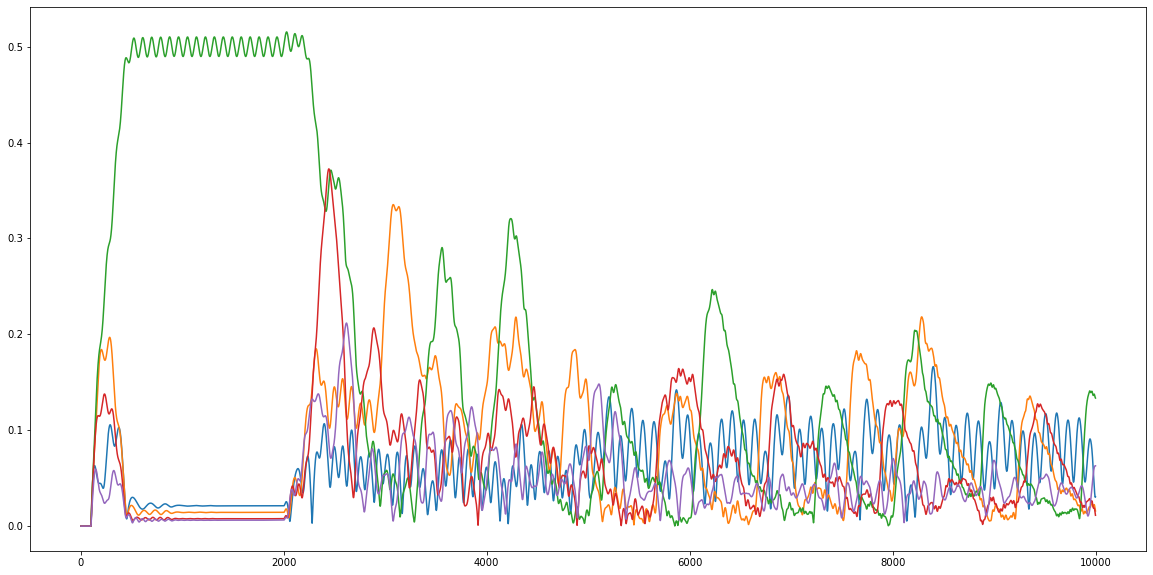

In [126]:
# View size of rls filter coeffs

if settings["max_num_harmonics"] > 1:
    Sr = S.reshape(settings["max_num_harmonics"], -1, N, order="F")
    Sr = np.linalg.norm(Sr, axis=0)
else:
    Sr = abs(S)
plt.figure(figsize=(20, 10))
plt.plot(Sr.T)

Sr.shape

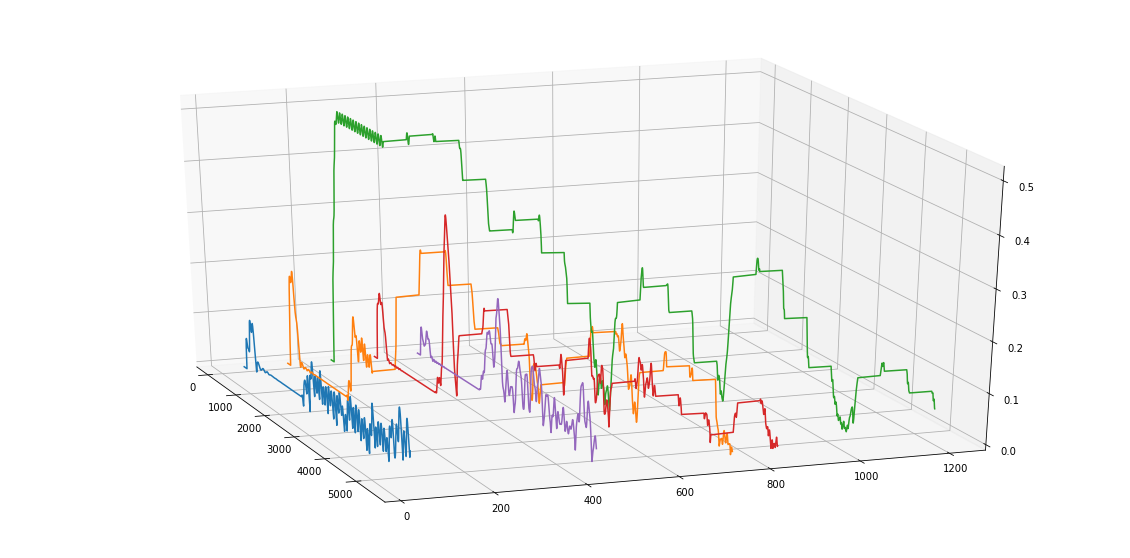

In [131]:
# Joint plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=25, azim=-20)
for i in range(5):
    ax.plot(t[:5500], P[i, :5500], Sr[i, :5500])


In [133]:
P[:, 1900]

array([ 50., 150., 250., 350., 450.])